In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('YoutubeCommentsDataSet.csv')

data

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [3]:
data.isna().sum()

Comment      44
Sentiment     0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.isna().sum()

Comment      0
Sentiment    0
dtype: int64

In [6]:
data

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative
4,apple pay is so convenient secure and easy to ...,positive
...,...,...
18403,i really like the point about engineering tool...,positive
18404,i’ve just started exploring this field and thi...,positive
18405,excelente video con una pregunta filosófica pr...,neutral
18406,hey daniel just discovered your channel a coup...,positive


In [7]:
data['Sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [8]:
data['Sentiment'] = data['Sentiment'].map({'negative':0,'neutral':1,'positive':2})

In [9]:
data

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,1
1,here in nz 50 of retailers don’t even have con...,0
2,i will forever acknowledge this channel with t...,2
3,whenever i go to a place that doesn’t take app...,0
4,apple pay is so convenient secure and easy to ...,2
...,...,...
18403,i really like the point about engineering tool...,2
18404,i’ve just started exploring this field and thi...,2
18405,excelente video con una pregunta filosófica pr...,1
18406,hey daniel just discovered your channel a coup...,2


In [10]:
import re

In [11]:
def clean_text(Comment):
    Comment = Comment.lower()
    Comment = re.sub(r'[^\w\s]','',Comment)
    Comment = re.sub(r'\d+','',Comment)
    return Comment

In [12]:
data['Comment'] = data['Comment'].apply(clean_text)

In [13]:
vector = CountVectorizer(stop_words='english')

In [14]:
X = vector.fit_transform(data['Comment'])

In [15]:
y = data['Sentiment']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
nb = MultinomialNB()

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 10.0],
    'fit_prior': [True, False]
}

nb = MultinomialNB()
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("✅ Best Parameters:", grid_search.best_params_)


✅ Best Parameters: {'alpha': 0.5, 'fit_prior': True}


In [19]:
nb = MultinomialNB(alpha= 0.5, fit_prior= True)
nb.fit(X_train,y_train)

MultinomialNB(alpha=0.5)

In [20]:
y_pred =nb.predict(X_test)
y_pred

array([1, 2, 2, ..., 2, 2, 2], dtype=int64)

In [21]:
pred =nb.predict(X_train)
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [22]:
accuracy_score(y_test,y_pred)

0.7247481622651784

In [23]:
accuracy_score(y_train,pred)

0.8451432850044245

In [24]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 223,   23,  195],
       [ 218,  292,  402],
       [  82,   91, 2147]], dtype=int64)

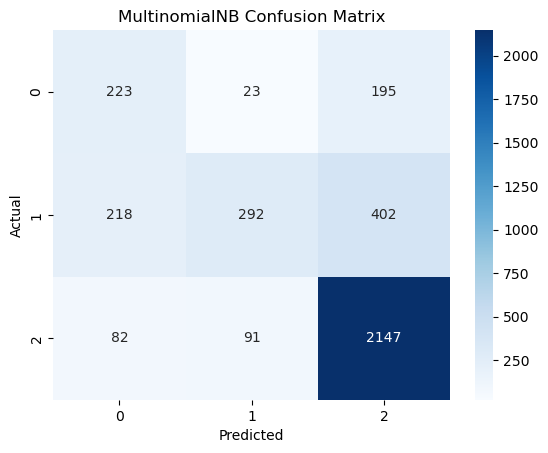

In [25]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

#  Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("MultinomialNB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
import pickle
with open("youtube_model.pkl", "wb") as file:
    pickle.dump(nb, file)

print("✅ Model saved!")

✅ Model saved!
